# PS Bunch Splitting Scenarios

This notebook explores different PS bunch splitting strategies and their impact on final LHC bunch intensities. Bunch splitting in the PS is a method to increase the total number of bunches while managing space charge limitations.

## Background

PS Bunch Splitting:
- Each injected bunch from LEIR can be split into two bunches in the PS, as done for Pb today.
- Splitting reduces individual bunch intensity but increases total bunches
- Common splitting factors: 1 (no splitting) or 2 (standard operational configuration)
- Trade-off between bunch intensity and total beam current
- Space charge limits become more relaxed with lower bunch intensities

Let's systematically compare these splitting scenarios:

In [1]:
# Import necessary libraries
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
from pathlib import Path
import sys

# Add the parent directory to Python path to import injector_model
sys.path.append(str(Path.cwd().parent))
from injector_model import InjectorChain

# Set up matplotlib for nice plots
plt.rcParams.update({
    "font.family": "serif",
    "font.size": 11,
    "axes.titlesize": 13,
    "axes.labelsize": 12,
    "legend.fontsize": 10,
})

print("Libraries imported successfully.")

Libraries imported successfully.


## 1. Define Different Splitting Scenarios

We'll test splitting factors from 1 (no splitting) up to 2 (standard operational limit):

In [2]:
# Define different PS splitting scenarios
splitting_factors = [1, 2]
scenarios = {}
results = {}

print("Creating InjectorChain instances for different PS splitting factors:")
print("=" * 65)

for split_factor in splitting_factors:
    scenario_name = f"PS_split_{split_factor}"
    
    # Create InjectorChain instance
    scenarios[scenario_name] = InjectorChain(
        LEIR_bunches=2,
        PS_splitting=split_factor,
        LEIR_PS_strip=False,
        account_for_LEIR_ecooling=True,  # Include e-cooling for realistic results
        account_for_PS_rest_gas=True
    )
    
    print(f"PS splitting = {split_factor:1d}  (Each LEIR bunch → {split_factor} PS bunches)")

print(f"\nTotal scenarios created: {len(scenarios)}")

Creating InjectorChain instances for different PS splitting factors:
Initiated ion type: Pb
Q_LEIR = 54.0, Q_PS = 54.0, Q_SPS = 82.0 (fully stripped)
Strip LEIR-PS: False
E-cooling time w.r.t to Pb: 1.000

PS splitting = 1  (Each LEIR bunch → 1 PS bunches)
Initiated ion type: Pb
Q_LEIR = 54.0, Q_PS = 54.0, Q_SPS = 82.0 (fully stripped)
Strip LEIR-PS: False
E-cooling time w.r.t to Pb: 1.000

PS splitting = 2  (Each LEIR bunch → 2 PS bunches)

Total scenarios created: 2


## 2. Calculate Results for All Scenarios

Let's calculate the LHC bunch intensities for each splitting scenario:

In [3]:
# Calculate intensities for each scenario
print("Calculating LHC bunch intensities for all splitting scenarios...")
print("This may take a moment...")
print()

for scenario_name, injector_chain in scenarios.items():
    split_factor = int(scenario_name.split('_')[-1])
    print(f"Calculating for PS splitting = {split_factor}...")
    
    # Calculate for all ion species
    results[scenario_name] = injector_chain.calculate_LHC_bunch_intensity_all_ion_species(save_csv=False)
    
    ions_calculated = len(results[scenario_name])
    print(f"  Completed for {ions_calculated} ion species")

print(f"\n✅ All calculations completed!")
print(f"Ion species analyzed: {list(results[list(results.keys())[0]].index)}")

Calculating LHC bunch intensities for all splitting scenarios...
This may take a moment...

Calculating for PS splitting = 1...
Initiated ion type: He
Q_LEIR = 1.0, Q_PS = 1.0, Q_SPS = 2.0 (fully stripped)
Strip LEIR-PS: False
E-cooling time w.r.t to Pb: 48.810

Ion type: He with Q_PS = 1.0
Account for rest gas in PS transmission: True, assume transmission = 0.7639097491244964 for cycle length: 1.2 s
Rounding number of LEIR injections DOWN, from 0.164!
Number of LEIR inejctions considering e-cooling: 1
SPS gamma0: 7.33600
Initiated ion type: O
Q_LEIR = 4.0, Q_PS = 4.0, Q_SPS = 8.0 (fully stripped)
Strip LEIR-PS: False
E-cooling time w.r.t to Pb: 11.320

Ion type: O with Q_PS = 4.0
Account for rest gas in PS transmission: True, assume transmission = 0.7269397232357733 for cycle length: 1.2 s
Rounding number of LEIR injections DOWN, from 0.707!
Number of LEIR inejctions considering e-cooling: 1
SPS gamma0: 7.33600
Initiated ion type: Mg
Q_LEIR = 7.0, Q_PS = 7.0, Q_SPS = 12.0 (fully strip

## 3. Compare Individual Bunch Intensities

Let's see how splitting affects the intensity per bunch:

Ions included in comparison: ['He', 'O', 'Mg', 'Ar', 'Ca', 'Kr', 'In', 'Xe', 'Pb']
Note: He excluded as it's not in WG5 reference data


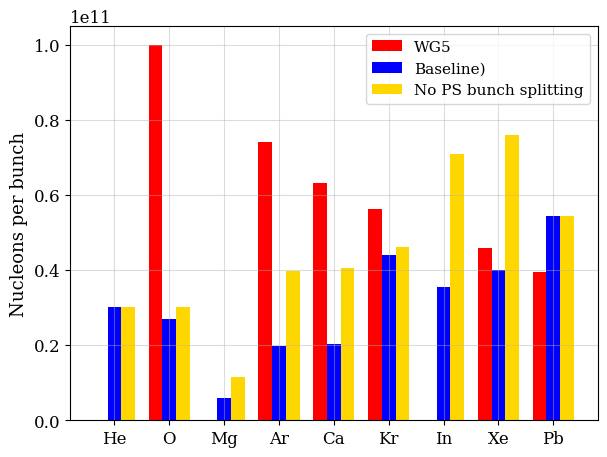

Comparison plot shows nucleons per bunch for different PS splitting scenarios
Red: WG5 reference values
Blue: PS splitting = 2 (baseline scenario)
Gold: PS splitting = 1 (no splitting)


In [24]:
# Load reference data for comparison
data_folder = Path.cwd().parent / 'data'
ref_Table_SPS = pd.read_csv(data_folder / 'test_and_benchmark_data' / 'SPS_final_intensities_WG5_and_Hannes.csv', index_col=0)

# Create comparison plot for nucleons per bunch
all_ions = list(results[list(results.keys())[0]].index)

# Get results for comparison
df_no_split = results['PS_split_1']  # PS splitting = 1 (no splitting) 
df_baseline = results['PS_split_2']  # PS splitting = 2 (baseline)

# Filter to only include ions that exist in WG5 data (exclude He)
ions_with_wg5 = [ion for ion in all_ions if ion in ref_Table_SPS.index]
print(f"Ions included in comparison: {ions_with_wg5}")
print(f"Note: He excluded as it's not in WG5 reference data")

# Set up plotting parameters to match calculation script style
SMALL_SIZE = 11
MEDIUM_SIZE = 12
BIGGER_SIZE = 13
plt.rcParams["font.family"] = "serif"
plt.rc('font', size=SMALL_SIZE)
plt.rc('axes', titlesize=BIGGER_SIZE)
plt.rc('axes', labelsize=BIGGER_SIZE)
plt.rc('xtick', labelsize=MEDIUM_SIZE)
plt.rc('ytick', labelsize=MEDIUM_SIZE)
plt.rc('legend', fontsize=SMALL_SIZE)

# Define bar width for bar plot
bar_width = 0.25
x = np.arange(len(ions_with_wg5))

# Create comparison plot: Nucleons per bunch with and without splitting
fig, ax = plt.subplots(1, 1, figsize=(6, 4.5))
bar1 = ax.bar(x - bar_width, ref_Table_SPS.loc[ions_with_wg5, 'WG5 Intensity'] * df_baseline.loc[ions_with_wg5, 'massNumber'], 
              bar_width, color='red', label='WG5')
bar2 = ax.bar(x, df_baseline.loc[ions_with_wg5, 'LHC_ionsPerBunch'] * df_baseline.loc[ions_with_wg5, 'massNumber'], 
              bar_width, color='blue', label='Baseline)')
bar3 = ax.bar(x + bar_width, df_no_split.loc[ions_with_wg5, 'LHC_ionsPerBunch'] * df_no_split.loc[ions_with_wg5, 'massNumber'], 
              bar_width, color='gold', label='No PS bunch splitting')
ax.grid(alpha=0.43)
ax.set_xticks(x)
ax.set_xticklabels(ions_with_wg5)
ax.set_ylabel("Nucleons per bunch")
ax.legend()
fig.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.show()

print("Comparison plot shows nucleons per bunch for different PS splitting scenarios")
print("Red: WG5 reference values")
print("Blue: PS splitting = 2 (baseline scenario)")
print("Gold: PS splitting = 1 (no splitting)")